In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [23]:

voter16 = pd.read_excel("voter16.xlsx")
inter16 = pd.read_excel("inter16.xlsx")


In [24]:
voter16.head()


,State,Percent registered\n(Total),Percent voted\n(Total),Turnout,Label (>mean 0.872)
0,ALABAMA,67.9617,56.3712,0.829455,0
1,ALASKA,69.0653,59.4061,0.860144,0
2,ARIZONA,60.5332,53.2880,0.880310,1
3,ARKANSAS,65.6858,56.0106,0.852705,0
4,CALIFORNIA,53.8432,48.2247,0.895651,1


In [25]:
inter16.head()

,State,Households with computer,internet access.,Poverty,Winning Margin,"BG(Y=1,N=0)"
0,Alabama .........................................,83.909992,75.284830,16.3,27.7,0
1,Alaska ..........................................,94.433488,86.695671,10.9,14.7,1
2,Arizona .........................................,91.044885,83.804423,16.6,3.5,0
3,Arkansas ........................................,84.479373,71.134348,16.1,26.9,0
4,California ......................................,92.120089,85.606221,13.9,30.1,1


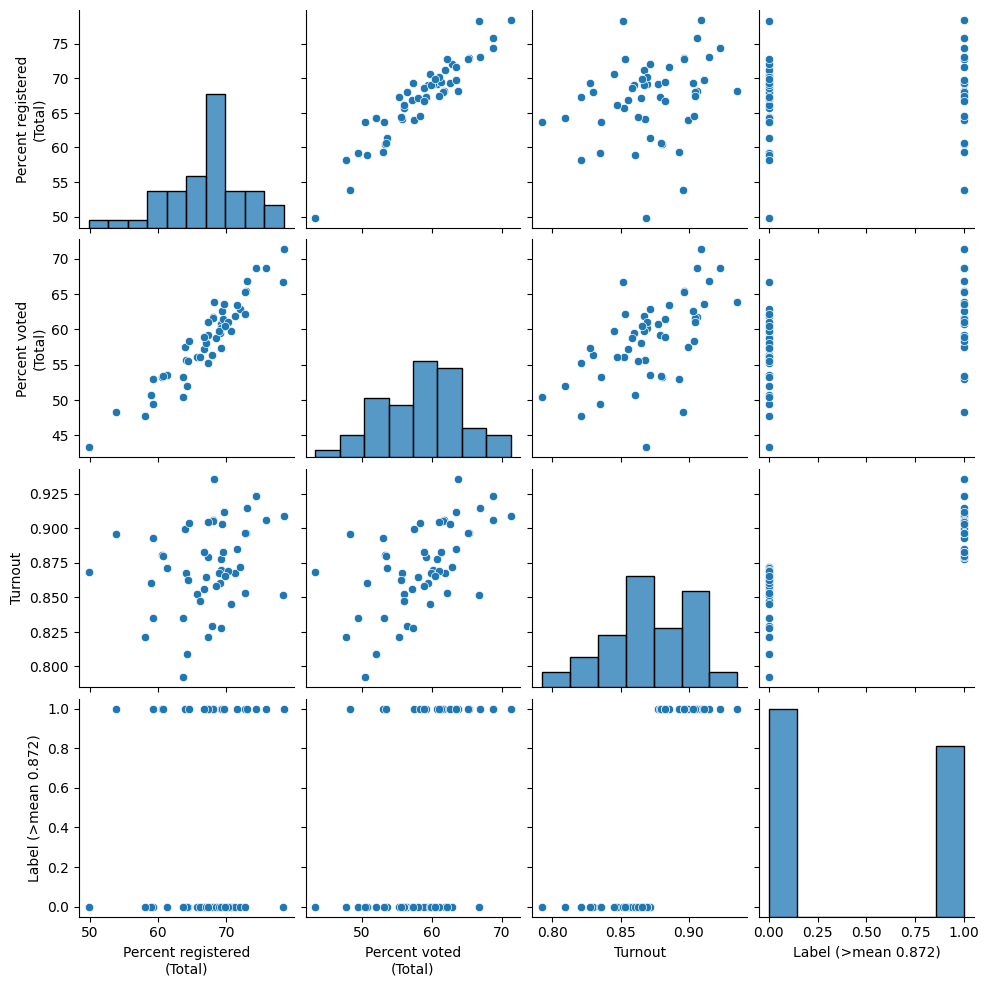

In [26]:
sns.pairplot(voter16)


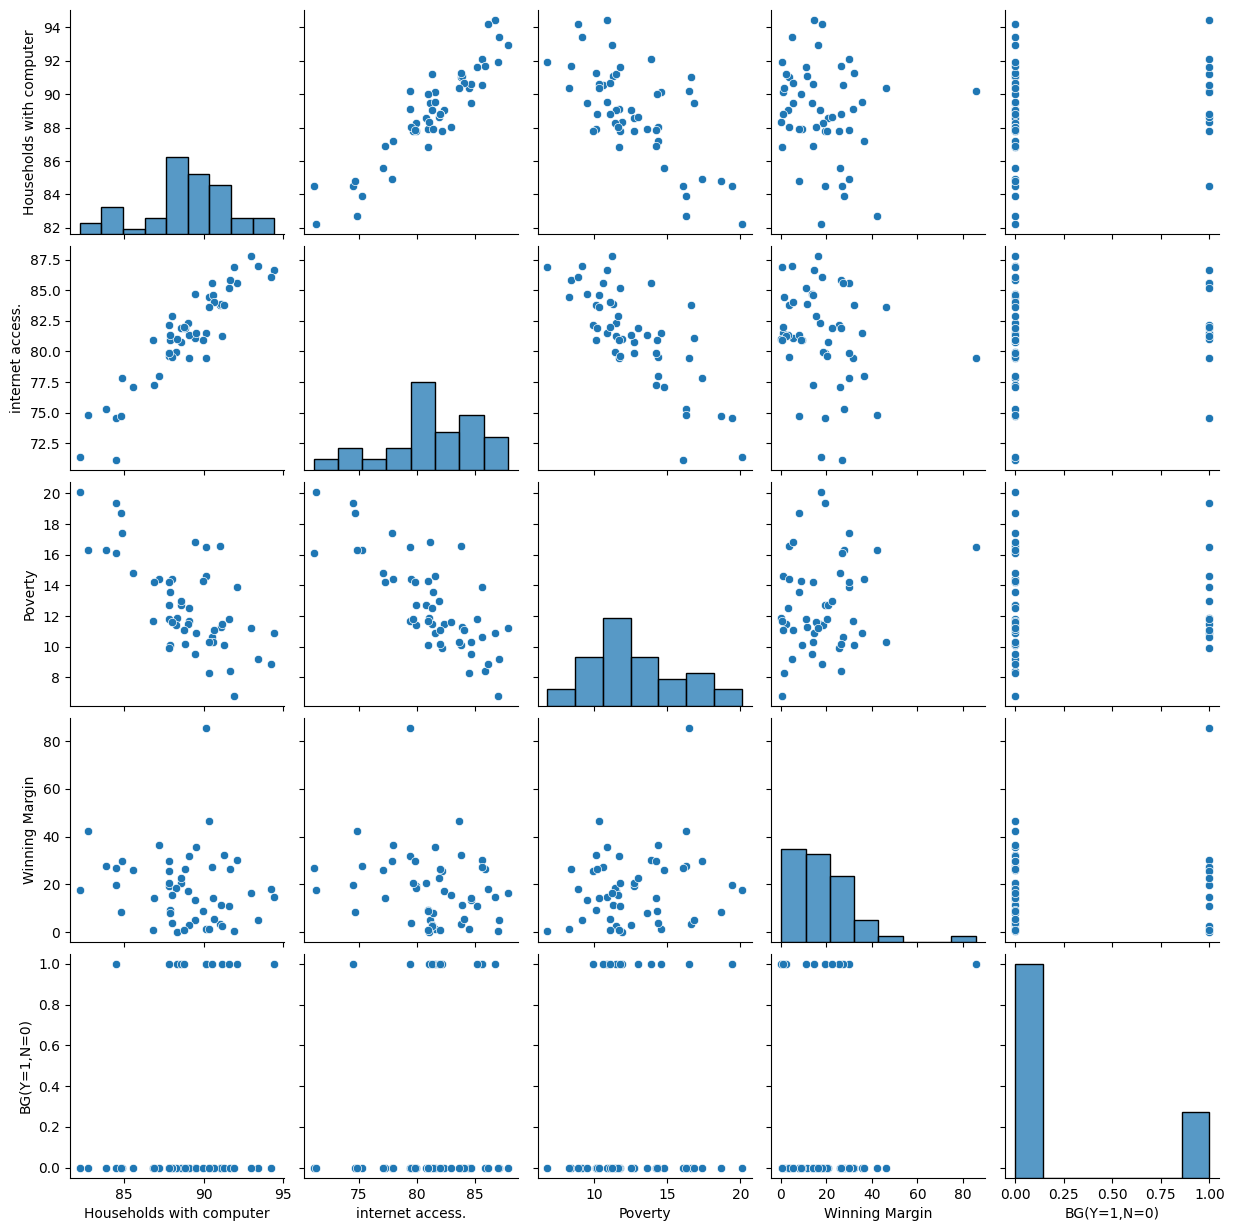

In [27]:
sns.pairplot(inter16)


In [28]:
y = voter16['Label (>mean 0.872)']
X = inter16.iloc[:,1:]
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [29]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -3.05926283823324
Coefficients: 
 [ 0.00323738  0.04286236 -0.02368434  0.00058298  0.12082873]


In [30]:
x = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                             OLS Regression Results                            
Dep. Variable:     Label (>mean 0.872)   R-squared:                       0.231
Model:                             OLS   Adj. R-squared:                  0.146
Method:                  Least Squares   F-statistic:                     2.711
Date:                 Fri, 05 May 2023   Prob (F-statistic):             0.0318
Time:                         04:30:19   Log-Likelihood:                -30.055
No. Observations:                   51   AIC:                             72.11
Df Residuals:                       45   BIC:                             83.70
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const         

In [31]:
print('R2 score:', model.rsquared)


R2 score: 0.23149543664929062


In [32]:
print('F-statistic:', model.fvalue)
print('Probability of observing value at least as high as F-statistic:', model.f_pvalue)

F-statistic: 2.711056029075032
Probability of observing value at least as high as F-statistic: 0.031765519987871284


In [33]:
print(model.pvalues)

const                       0.361875
Households with computer    0.958289
internet access.            0.410283
Poverty                     0.521718
Winning Margin              0.896956
BG(Y=1,N=0)                 0.458694
dtype: float64
